<a href="https://colab.research.google.com/github/RuslanDulaev/Rainfall_prediction/blob/main/rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Создание датафрейма

In [3]:
df = pd.read_csv('/content/train.csv', index_col='id')

In [65]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
id,,,,,,,,,,,,
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


## Проверка на пустые значения

In [4]:
print(df.isnull().sum())

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64


## Вывод типов данных датафрейма

In [5]:
print(df.dtypes)

day                int64
pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
rainfall           int64
dtype: object


## Визуализация матрицы корреляций

In [6]:
matrix_correlation = df.corr()

<Axes: >

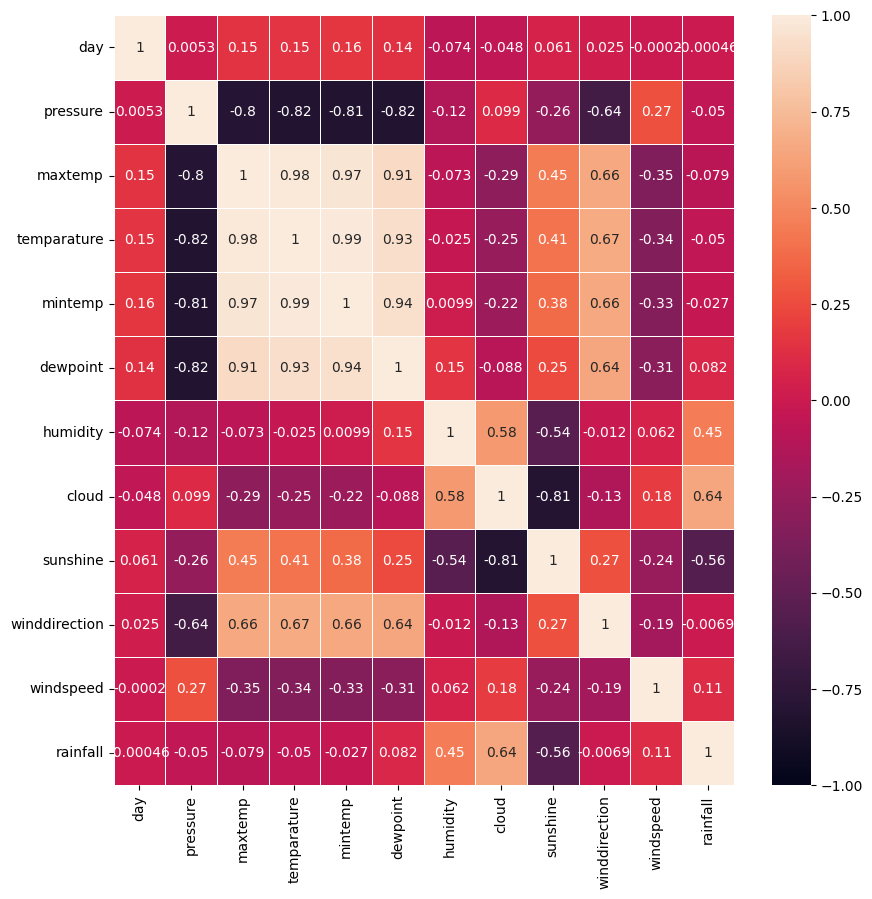

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(matrix_correlation, annot=True, vmin=-1, vmax=1, linewidths=0.5)

## Вывод гистограм всех переменных из датасета

array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'maxtemp'}>],
       [<Axes: title={'center': 'temparature'}>,
        <Axes: title={'center': 'mintemp'}>,
        <Axes: title={'center': 'dewpoint'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'cloud'}>,
        <Axes: title={'center': 'sunshine'}>],
       [<Axes: title={'center': 'winddirection'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'rainfall'}>]], dtype=object)

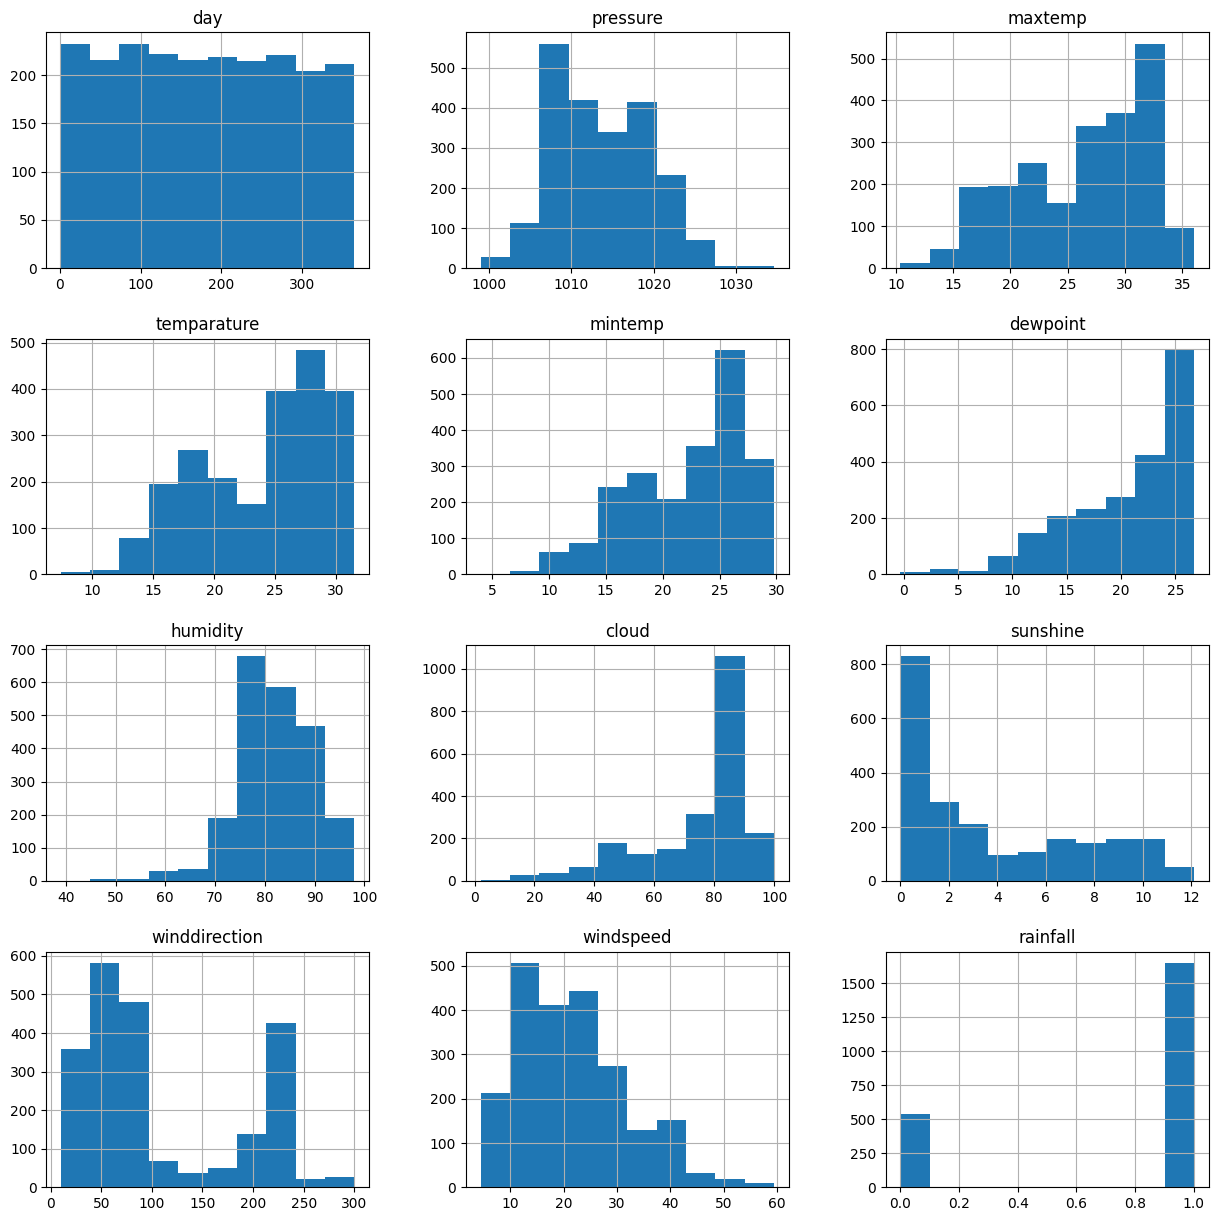

In [8]:
df.hist(figsize=(15,15))

## Графики box-plot для всех предикторов

In [9]:
columns_for_box = df.drop(columns=['day', 'rainfall'])
columns_for_box

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
id,,,,,,,,,,
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8
...,...,...,...,...,...,...,...,...,...,...
2185,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1
2186,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3
2187,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9


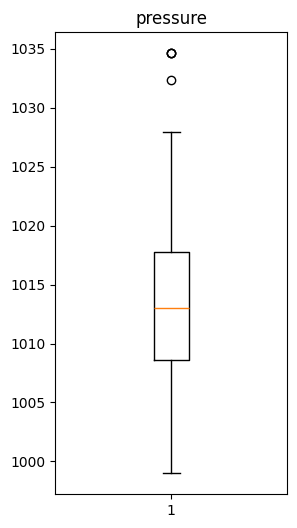

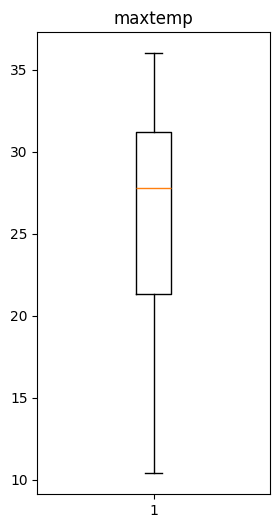

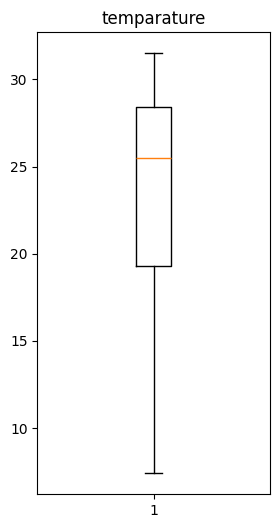

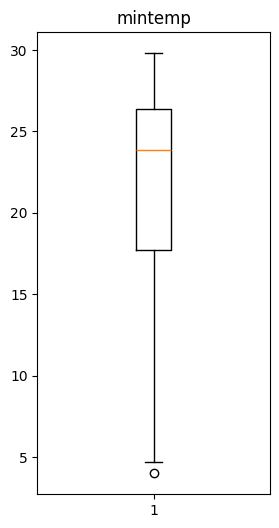

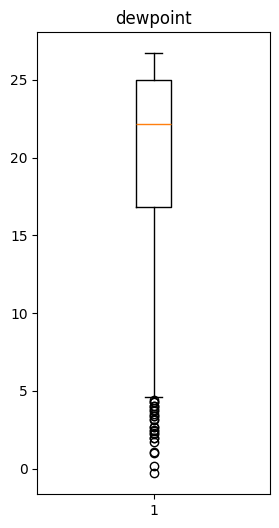

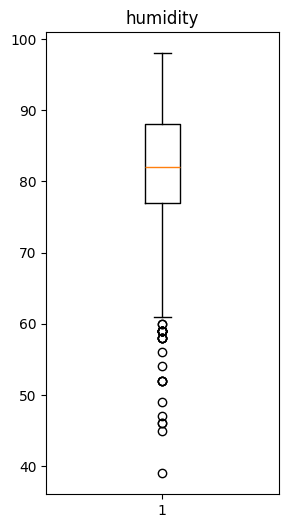

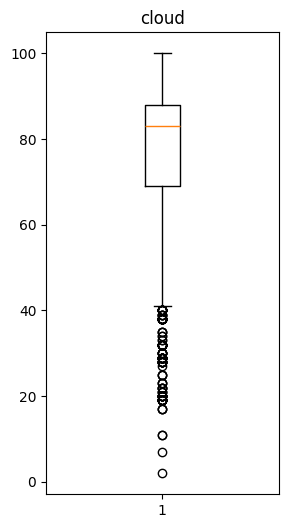

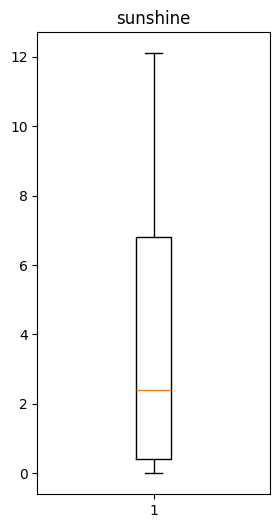

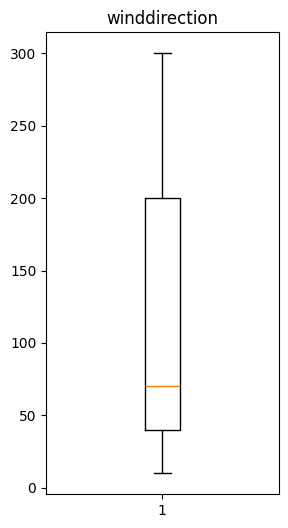

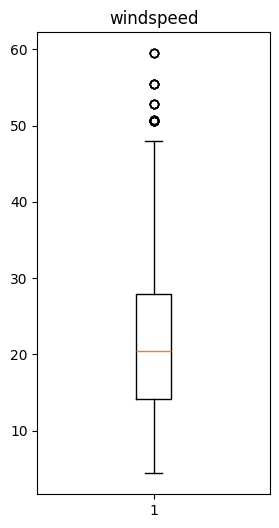

In [10]:
for column in columns_for_box:
  plt.figure(figsize=(3, 6))
  plt.boxplot(columns_for_box[column])
  plt.title(column)
  plt.show()

## Разделение данных на предикторы и целевую переменную

In [11]:
X = df.drop('rainfall', axis=1)
y = df['rainfall']

## Создание дополнительных предикторов

In [12]:
X['temp_range'] = X['maxtemp'] - X['mintemp']
X['month'] = pd.to_datetime(X['day'], format='%j').dt.month_name()

# One-hot encoding для столбца со значениями месяца

In [13]:
X.drop(columns=['day'], inplace=True)
X = pd.get_dummies(X)

In [14]:
X

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
id,,,,,,,,,,,,,,,,,,,,,
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,...,False,False,True,False,False,False,False,False,False,False
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,...,False,False,True,False,False,False,False,False,False,False
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,...,False,False,True,False,False,False,False,False,False,False
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,...,False,False,True,False,False,False,False,False,False,False
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,...,True,False,False,False,False,False,False,False,False,False
2186,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,...,True,False,False,False,False,False,False,False,False,False
2187,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,...,True,False,False,False,False,False,False,False,False,False


## Масштабирование признаков

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
numeric_cols = ['pressure',	'maxtemp', 'temparature',	'mintemp',	'dewpoint',	'humidity',	'cloud',	'sunshine',	'winddirection', 'windspeed']

In [17]:
scaler = MinMaxScaler().fit(X[numeric_cols])

In [18]:
X[numeric_cols] = scaler.transform(X[numeric_cols])

## Разбиение данных на тренировочную и тестовую выбрки

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Обучение модели DecisionTreeClassifier

In [20]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [21]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 10), 'min_samples_leaf': range(2, 5), 'min_samples_split': range(2, 5)}

In [22]:
grid_search_cv_clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv=5)

In [23]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(2, 5)})

In [24]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [25]:
best_model_1 = grid_search_cv_clf.best_estimator_

In [26]:
best_model_1.score(X_train, y_train)

0.8761415525114156

In [27]:
best_model_1.score(X_test, y_test)

0.8356164383561644

## Обучение модели RandomForestClassifier



In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 5), 'min_samples_leaf': range(2, 5), 'min_samples_split': range(2, 5)}

In [30]:
grid_search_cv_clf_2 = GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [31]:
grid_search_cv_clf_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(2, 5)})

In [32]:
best_model_2 = grid_search_cv_clf_2.best_estimator_

In [33]:
best_model_2.score(X_train, y_train)

0.8841324200913242

In [34]:
best_model_2.score(X_test, y_test)

0.8447488584474886

## Обучение модели LogisticRegression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
parametrs = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

In [37]:
grid_search_cv_clf_3 = GridSearchCV(LogisticRegression(), parametrs, cv=5)

In [38]:
grid_search_cv_clf_3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [39]:
best_model_3 = grid_search_cv_clf_3.best_estimator_

In [40]:
best_model_3.score(X_train, y_train)

0.8710045662100456

In [41]:
best_model_3.score(X_test, y_test)

0.8493150684931506

## Обучение модели XGBRegressor

In [42]:
from xgboost import XGBClassifier

In [43]:
parametrs = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}

In [44]:
grid_search_cv_clf_4 = GridSearchCV(XGBClassifier(), parametrs, cv=5, scoring="accuracy")
grid_search_cv_clf_4.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [45]:
best_model_4 = grid_search_cv_clf_4.best_estimator_

In [46]:
best_model_4.score(X_train, y_train)

0.9377853881278538

In [47]:
best_model_4.score(X_test, y_test)

0.8561643835616438

In [51]:
y_pred_4 = best_model_4.predict(X_test)

## Классификационный отчет

In [49]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.81      0.61      0.70       119
           1       0.87      0.95      0.91       319

    accuracy                           0.86       438
   macro avg       0.84      0.78      0.80       438
weighted avg       0.85      0.86      0.85       438



## Матрица ошибок

In [54]:
from sklearn.metrics import confusion_matrix

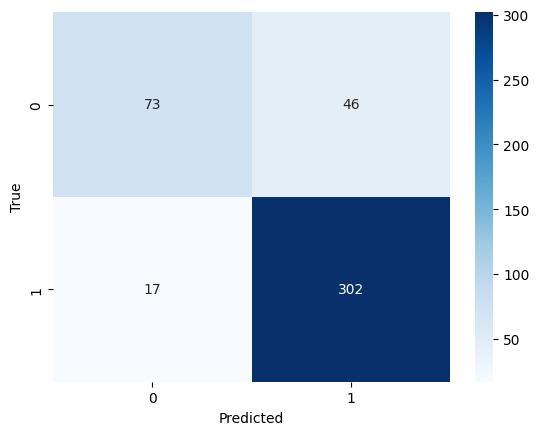

In [59]:
cm = confusion_matrix(y_test, y_pred_4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Важность признаков

<ipython-input-62-9d4b7e51950e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importance_df['Importance'][:10], y=rf_importance_df['Feature'][:10], palette='viridis')


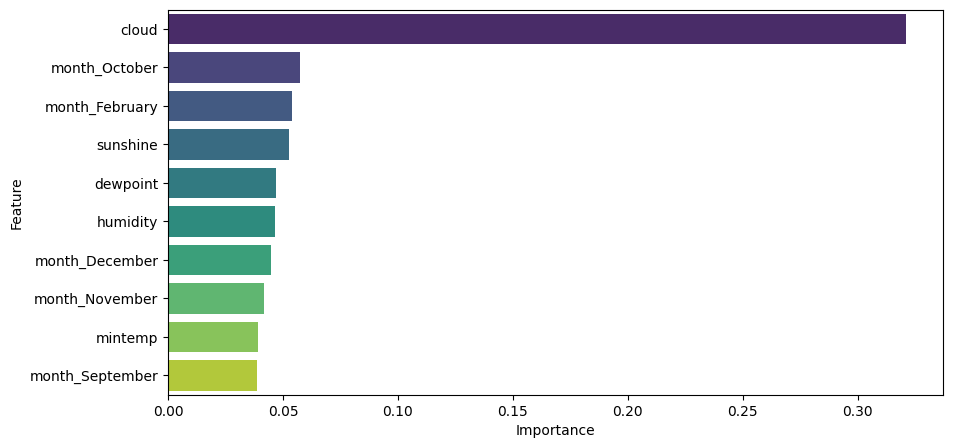

In [62]:
rf_importance = best_model_4.feature_importances_
rf_features = X.columns
rf_importance_df = pd.DataFrame({'Feature': rf_features, 'Importance': rf_importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=rf_importance_df['Importance'][:10], y=rf_importance_df['Feature'][:10], palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Визуализация ROC-кривых

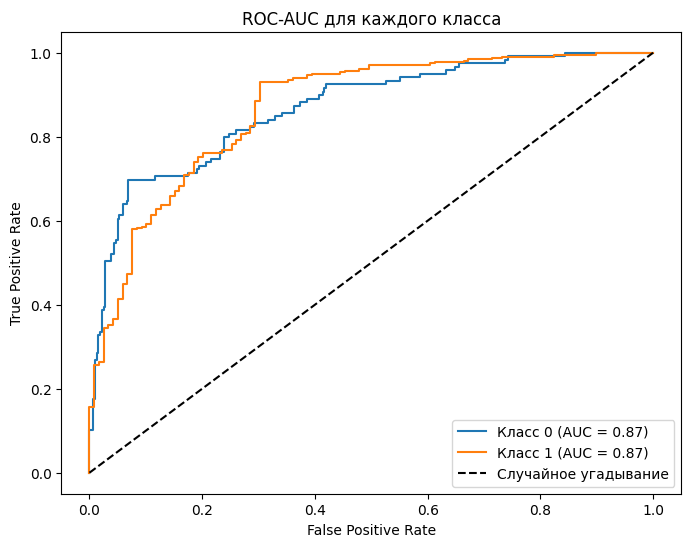

In [64]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_pred_proba = best_model_4.predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

plt.figure(figsize=(8,6))

for i in range(2):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Класс {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label="Случайное угадывание")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC для каждого класса")
plt.legend()
plt.show()